### Training of modified U-Net for Optic Disc on DRISHTI-GS database (cross-validation fold #0).

In [1]:
%load_ext autoreload
%autoreload 2

import tensorflow as tf
import matplotlib.pyplot as plt
import h5py

from model import *
from process_images import *
from process_result import *

print('Keras version:', keras.__version__)
print('TensorFlow version:', tf.__version__)

Keras version: 2.5.0
TensorFlow version: 2.5.0


#### DRISHTI-GS

Accessing data, preparing train/validation sets division:

In [2]:
h5f = h5py.File(os.path.join(os.path.dirname(os.getcwd()), 'data', 'hdf5_datasets', 'DRISHTI_GS.hdf5'), 'r')

###############################################################################################################

img_train = h5f['DRISHTI-GS/512 px/images']
cup_train = h5f['DRISHTI-GS/512 px/cup']
disc_train = h5f['DRISHTI-GS/512 px/disc']
disc_locations = h5f['DRISHTI-GS/512 px/disc_locations']

img_test = h5f['DRISHTI-GS-test/512 px/images']
cup_test = h5f['DRISHTI-GS-test/512 px/cup']
disc_test = h5f['DRISHTI-GS-test/512 px/disc']
disc_locations_test = h5f['DRISHTI-GS-test/512 px/disc_locations']

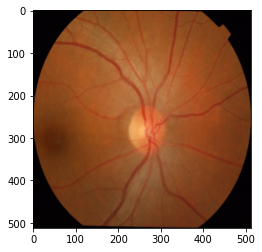

(50, 512, 512, 3)


(<HDF5 dataset "images": shape (50, 512, 512, 3), type "|u1">,
 <HDF5 dataset "cup": shape (50, 512, 512, 1), type "|u1">,
 <HDF5 dataset "disc": shape (50, 512, 512, 1), type "|u1">,
 <HDF5 dataset "disc_locations": shape (50, 4), type "<i8">)

In [3]:
plt.imshow(img_train[45])
plt.show()
print(img_train.shape)
img_train, cup_train, disc_train, disc_locations

### Train images

In [4]:
lab_a_channel_train = convert_to_lab(1, img_train)
len(lab_a_channel_train)

50

### Test images

In [5]:
lab_a_channel_test = convert_to_lab(1, img_test)
len(lab_a_channel_test)

51

#### Generator of augmented data:

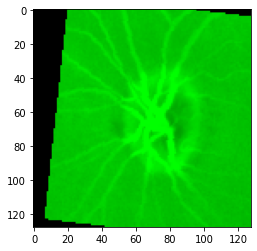

In [6]:
gen = data_generator(lab_a_channel_train, cup_train, disc_locations, 128, 'train', batch_size=1)
batch = next(gen)

plt.imshow(batch[0][0])

51
51


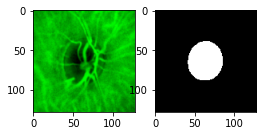

In [7]:
img_size = IMG_SIZE

X_test, Y_test = next(data_generator(lab_a_channel_test, cup_test, disc_locations_test, img_size, train_or_test='test', batch_size=100, stationary=True))
print(len(X_test)) 
print(len(Y_test))

#-----------------------
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1, 2, 1)
ax.imshow(np.squeeze(X_test[10]), cmap=plt.cm.Greys_r)
ax = fig.add_subplot(1, 2, 2)
ax.imshow(np.squeeze(Y_test[10]), cmap=plt.cm.Greys_r)
plt.show()

### Training and test cup

In [8]:
epochs = NUM_EPOCHS
spe = SPE
model = create_compile_model(img_size)
history_cup = train(lab_a_channel_train, 
                    cup_train, 
                    disc_locations, 
                    'cup_lab_a', 
                    model, 
                    epochs, X_test, Y_test, img_size, spe)

Epoch 1/500
99/99 [==============================] - 73s 694ms/step - loss: 1.6001 - mean_IOU_gpu: 0.0779 - dice_metric: 0.1433 - val_loss: 1.4748 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 2/500
99/99 [==============================] - 67s 681ms/step - loss: 1.4841 - mean_IOU_gpu: 0.0286 - dice_metric: 0.0540 - val_loss: 1.4575 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 3/500
99/99 [==============================] - 68s 691ms/step - loss: 1.4766 - mean_IOU_gpu: 4.4264e-06 - dice_metric: 8.8489e-06 - val_loss: 1.4394 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 4/500
99/99 [==============================] - 72s 726ms/step - loss: 1.5234 - mean_IOU_gpu: 0.0000e+00 - dice_metric: 0.0000e+00 - val_loss: 1.4200 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 5/500
99/99 [==============================] - 70s 703ms/step - loss: 1.5319 - mean_IOU_gpu: 0.0000e+00 - dice_metric: 0.0000e+00 - val_loss: 1.40

Epoch 40/500
99/99 [==============================] - 62s 628ms/step - loss: 0.4073 - mean_IOU_gpu: 0.4673 - dice_metric: 0.6245 - val_loss: 2.9603 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 41/500
99/99 [==============================] - 63s 640ms/step - loss: 0.3328 - mean_IOU_gpu: 0.5306 - dice_metric: 0.6827 - val_loss: 2.5156 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 42/500
99/99 [==============================] - 62s 623ms/step - loss: 0.3436 - mean_IOU_gpu: 0.5270 - dice_metric: 0.6755 - val_loss: 3.0010 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 43/500
99/99 [==============================] - 63s 632ms/step - loss: 0.3491 - mean_IOU_gpu: 0.5232 - dice_metric: 0.6718 - val_loss: 0.7817 - val_mean_IOU_gpu: 0.0923 - val_dice_metric: 0.1342
Epoch 44/500
99/99 [==============================] - 65s 656ms/step - loss: 0.3710 - mean_IOU_gpu: 0.5009 - dice_metric: 0.6528 - val_loss: 2.0616 - val_mean_IOU_gpu: 0.00

99/99 [==============================] - 62s 623ms/step - loss: 0.2866 - mean_IOU_gpu: 0.5713 - dice_metric: 0.7151 - val_loss: 0.2312 - val_mean_IOU_gpu: 0.6585 - val_dice_metric: 0.7731
Epoch 81/500
99/99 [==============================] - 62s 624ms/step - loss: 0.2737 - mean_IOU_gpu: 0.5802 - dice_metric: 0.7240 - val_loss: 0.2248 - val_mean_IOU_gpu: 0.6849 - val_dice_metric: 0.7943
Epoch 82/500
99/99 [==============================] - 61s 613ms/step - loss: 0.2920 - mean_IOU_gpu: 0.5651 - dice_metric: 0.7096 - val_loss: 0.2590 - val_mean_IOU_gpu: 0.6812 - val_dice_metric: 0.7946
Epoch 83/500
99/99 [==============================] - 61s 615ms/step - loss: 0.3117 - mean_IOU_gpu: 0.5523 - dice_metric: 0.6979 - val_loss: 0.2543 - val_mean_IOU_gpu: 0.6577 - val_dice_metric: 0.7701
Epoch 84/500
99/99 [==============================] - 62s 625ms/step - loss: 0.2910 - mean_IOU_gpu: 0.5688 - dice_metric: 0.7127 - val_loss: 0.2392 - val_mean_IOU_gpu: 0.6831 - val_dice_metric: 0.7899
Epoch 85

Epoch 121/500
99/99 [==============================] - 61s 620ms/step - loss: 0.2494 - mean_IOU_gpu: 0.6006 - dice_metric: 0.7408 - val_loss: 0.3993 - val_mean_IOU_gpu: 0.4445 - val_dice_metric: 0.5967
Epoch 122/500
99/99 [==============================] - 64s 643ms/step - loss: 0.2808 - mean_IOU_gpu: 0.5781 - dice_metric: 0.7192 - val_loss: 0.3336 - val_mean_IOU_gpu: 0.5005 - val_dice_metric: 0.6463
Epoch 123/500
99/99 [==============================] - 62s 629ms/step - loss: 0.2780 - mean_IOU_gpu: 0.5770 - dice_metric: 0.7210 - val_loss: 0.4480 - val_mean_IOU_gpu: 0.4126 - val_dice_metric: 0.5666
Epoch 124/500
99/99 [==============================] - 63s 635ms/step - loss: 0.2556 - mean_IOU_gpu: 0.5943 - dice_metric: 0.7357 - val_loss: 0.3559 - val_mean_IOU_gpu: 0.4809 - val_dice_metric: 0.6291
Epoch 125/500
99/99 [==============================] - 62s 631ms/step - loss: 0.2513 - mean_IOU_gpu: 0.5926 - dice_metric: 0.7343 - val_loss: 0.3762 - val_mean_IOU_gpu: 0.4634 - val_dice_metri

99/99 [==============================] - 62s 623ms/step - loss: 0.2412 - mean_IOU_gpu: 0.5993 - dice_metric: 0.7395 - val_loss: 0.3341 - val_mean_IOU_gpu: 0.5108 - val_dice_metric: 0.6545
Epoch 162/500
99/99 [==============================] - 61s 618ms/step - loss: 0.2713 - mean_IOU_gpu: 0.5840 - dice_metric: 0.7225 - val_loss: 0.3844 - val_mean_IOU_gpu: 0.4661 - val_dice_metric: 0.6157
Epoch 163/500
99/99 [==============================] - 60s 604ms/step - loss: 0.2657 - mean_IOU_gpu: 0.5804 - dice_metric: 0.7245 - val_loss: 0.3513 - val_mean_IOU_gpu: 0.4961 - val_dice_metric: 0.6390
Epoch 164/500
99/99 [==============================] - 62s 622ms/step - loss: 0.2540 - mean_IOU_gpu: 0.5940 - dice_metric: 0.7348 - val_loss: 0.3528 - val_mean_IOU_gpu: 0.4914 - val_dice_metric: 0.6370
Epoch 165/500
99/99 [==============================] - 62s 628ms/step - loss: 0.2465 - mean_IOU_gpu: 0.6040 - dice_metric: 0.7428 - val_loss: 0.2916 - val_mean_IOU_gpu: 0.5653 - val_dice_metric: 0.6969
Epoc

Epoch 202/500
99/99 [==============================] - 42s 426ms/step - loss: 0.2650 - mean_IOU_gpu: 0.5795 - dice_metric: 0.7232 - val_loss: 0.3060 - val_mean_IOU_gpu: 0.5483 - val_dice_metric: 0.6856
Epoch 203/500
99/99 [==============================] - 43s 436ms/step - loss: 0.2694 - mean_IOU_gpu: 0.5766 - dice_metric: 0.7204 - val_loss: 0.3620 - val_mean_IOU_gpu: 0.4905 - val_dice_metric: 0.6368
Epoch 204/500
99/99 [==============================] - 42s 429ms/step - loss: 0.2571 - mean_IOU_gpu: 0.5846 - dice_metric: 0.7280 - val_loss: 0.3609 - val_mean_IOU_gpu: 0.4928 - val_dice_metric: 0.6385
Epoch 205/500
99/99 [==============================] - 43s 434ms/step - loss: 0.2678 - mean_IOU_gpu: 0.5865 - dice_metric: 0.7273 - val_loss: 0.2914 - val_mean_IOU_gpu: 0.5638 - val_dice_metric: 0.6980
Epoch 206/500
99/99 [==============================] - 43s 431ms/step - loss: 0.2483 - mean_IOU_gpu: 0.5816 - dice_metric: 0.7283 - val_loss: 0.3513 - val_mean_IOU_gpu: 0.5026 - val_dice_metri

99/99 [==============================] - 42s 428ms/step - loss: 0.2305 - mean_IOU_gpu: 0.6200 - dice_metric: 0.7544 - val_loss: 0.3138 - val_mean_IOU_gpu: 0.5384 - val_dice_metric: 0.6778
Epoch 243/500
99/99 [==============================] - 42s 425ms/step - loss: 0.2506 - mean_IOU_gpu: 0.6025 - dice_metric: 0.7404 - val_loss: 0.3192 - val_mean_IOU_gpu: 0.5374 - val_dice_metric: 0.6771
Epoch 244/500
99/99 [==============================] - 43s 430ms/step - loss: 0.2055 - mean_IOU_gpu: 0.6422 - dice_metric: 0.7748 - val_loss: 0.3125 - val_mean_IOU_gpu: 0.5411 - val_dice_metric: 0.6798
Epoch 245/500
99/99 [==============================] - 43s 430ms/step - loss: 0.2699 - mean_IOU_gpu: 0.5893 - dice_metric: 0.7275 - val_loss: 0.3075 - val_mean_IOU_gpu: 0.5468 - val_dice_metric: 0.6846
Epoch 246/500
99/99 [==============================] - 42s 421ms/step - loss: 0.2723 - mean_IOU_gpu: 0.6093 - dice_metric: 0.7412 - val_loss: 0.4142 - val_mean_IOU_gpu: 0.4688 - val_dice_metric: 0.6175
Epoc

Epoch 283/500
99/99 [==============================] - 42s 427ms/step - loss: 0.2030 - mean_IOU_gpu: 0.6393 - dice_metric: 0.7729 - val_loss: 0.3306 - val_mean_IOU_gpu: 0.5307 - val_dice_metric: 0.6687
Epoch 284/500
99/99 [==============================] - 43s 432ms/step - loss: 0.2045 - mean_IOU_gpu: 0.6405 - dice_metric: 0.7735 - val_loss: 0.3834 - val_mean_IOU_gpu: 0.4809 - val_dice_metric: 0.6269
Epoch 285/500
99/99 [==============================] - 42s 426ms/step - loss: 0.2419 - mean_IOU_gpu: 0.6157 - dice_metric: 0.7490 - val_loss: 0.3624 - val_mean_IOU_gpu: 0.5043 - val_dice_metric: 0.6467
Epoch 286/500
99/99 [==============================] - 43s 438ms/step - loss: 0.2219 - mean_IOU_gpu: 0.6411 - dice_metric: 0.7695 - val_loss: 0.3746 - val_mean_IOU_gpu: 0.4907 - val_dice_metric: 0.6340
Epoch 287/500
99/99 [==============================] - 43s 431ms/step - loss: 0.2480 - mean_IOU_gpu: 0.6045 - dice_metric: 0.7423 - val_loss: 0.3578 - val_mean_IOU_gpu: 0.5133 - val_dice_metri

99/99 [==============================] - 42s 424ms/step - loss: 0.2066 - mean_IOU_gpu: 0.6439 - dice_metric: 0.7746 - val_loss: 0.4018 - val_mean_IOU_gpu: 0.4573 - val_dice_metric: 0.6069
Epoch 324/500
99/99 [==============================] - 42s 427ms/step - loss: 0.1866 - mean_IOU_gpu: 0.6745 - dice_metric: 0.7964 - val_loss: 0.3986 - val_mean_IOU_gpu: 0.4595 - val_dice_metric: 0.6090
Epoch 325/500
99/99 [==============================] - 42s 429ms/step - loss: 0.2020 - mean_IOU_gpu: 0.6494 - dice_metric: 0.7790 - val_loss: 0.3359 - val_mean_IOU_gpu: 0.5122 - val_dice_metric: 0.6558
Epoch 326/500
99/99 [==============================] - 42s 424ms/step - loss: 0.2012 - mean_IOU_gpu: 0.6577 - dice_metric: 0.7836 - val_loss: 0.3203 - val_mean_IOU_gpu: 0.5252 - val_dice_metric: 0.6671
Epoch 327/500
99/99 [==============================] - 42s 429ms/step - loss: 0.2033 - mean_IOU_gpu: 0.6454 - dice_metric: 0.7766 - val_loss: 0.3758 - val_mean_IOU_gpu: 0.4792 - val_dice_metric: 0.6270
Epoc

Epoch 364/500
99/99 [==============================] - 43s 433ms/step - loss: 0.1887 - mean_IOU_gpu: 0.6778 - dice_metric: 0.7982 - val_loss: 0.3608 - val_mean_IOU_gpu: 0.4705 - val_dice_metric: 0.6222
Epoch 365/500
99/99 [==============================] - 43s 437ms/step - loss: 0.1857 - mean_IOU_gpu: 0.6797 - dice_metric: 0.7999 - val_loss: 0.3607 - val_mean_IOU_gpu: 0.4655 - val_dice_metric: 0.6181
Epoch 366/500
99/99 [==============================] - 43s 430ms/step - loss: 0.1683 - mean_IOU_gpu: 0.7078 - dice_metric: 0.8197 - val_loss: 0.4056 - val_mean_IOU_gpu: 0.4336 - val_dice_metric: 0.5879
Epoch 367/500
99/99 [==============================] - 43s 432ms/step - loss: 0.2424 - mean_IOU_gpu: 0.6177 - dice_metric: 0.7505 - val_loss: 0.3198 - val_mean_IOU_gpu: 0.5103 - val_dice_metric: 0.6573
Epoch 368/500
99/99 [==============================] - 42s 423ms/step - loss: 0.2064 - mean_IOU_gpu: 0.6528 - dice_metric: 0.7792 - val_loss: 0.4120 - val_mean_IOU_gpu: 0.4337 - val_dice_metri

99/99 [==============================] - 42s 429ms/step - loss: 0.1955 - mean_IOU_gpu: 0.6660 - dice_metric: 0.7904 - val_loss: 0.2941 - val_mean_IOU_gpu: 0.5376 - val_dice_metric: 0.6805
Epoch 405/500
99/99 [==============================] - 42s 428ms/step - loss: 0.1973 - mean_IOU_gpu: 0.6618 - dice_metric: 0.7849 - val_loss: 0.4576 - val_mean_IOU_gpu: 0.4108 - val_dice_metric: 0.5654
Epoch 406/500
99/99 [==============================] - 42s 422ms/step - loss: 0.1648 - mean_IOU_gpu: 0.7147 - dice_metric: 0.8225 - val_loss: 0.3631 - val_mean_IOU_gpu: 0.4747 - val_dice_metric: 0.6258
Epoch 407/500
99/99 [==============================] - 42s 429ms/step - loss: 0.1667 - mean_IOU_gpu: 0.6926 - dice_metric: 0.8116 - val_loss: 0.4116 - val_mean_IOU_gpu: 0.4373 - val_dice_metric: 0.5910
Epoch 408/500
99/99 [==============================] - 43s 431ms/step - loss: 0.1874 - mean_IOU_gpu: 0.6833 - dice_metric: 0.8001 - val_loss: 0.3876 - val_mean_IOU_gpu: 0.4560 - val_dice_metric: 0.6085
Epoc

Epoch 445/500
99/99 [==============================] - 43s 429ms/step - loss: 0.1574 - mean_IOU_gpu: 0.7099 - dice_metric: 0.8226 - val_loss: 0.3703 - val_mean_IOU_gpu: 0.4646 - val_dice_metric: 0.6171
Epoch 446/500
99/99 [==============================] - 43s 435ms/step - loss: 0.1474 - mean_IOU_gpu: 0.7195 - dice_metric: 0.8296 - val_loss: 0.3139 - val_mean_IOU_gpu: 0.5089 - val_dice_metric: 0.6570
Epoch 447/500
99/99 [==============================] - 42s 429ms/step - loss: 0.1514 - mean_IOU_gpu: 0.7194 - dice_metric: 0.8287 - val_loss: 0.2529 - val_mean_IOU_gpu: 0.5707 - val_dice_metric: 0.7084
Epoch 448/500
99/99 [==============================] - 43s 435ms/step - loss: 0.1335 - mean_IOU_gpu: 0.7416 - dice_metric: 0.8448 - val_loss: 0.2708 - val_mean_IOU_gpu: 0.5540 - val_dice_metric: 0.6946
Epoch 449/500
99/99 [==============================] - 42s 429ms/step - loss: 0.1394 - mean_IOU_gpu: 0.7382 - dice_metric: 0.8416 - val_loss: 0.2540 - val_mean_IOU_gpu: 0.5673 - val_dice_metri

99/99 [==============================] - 42s 429ms/step - loss: 0.1383 - mean_IOU_gpu: 0.7442 - dice_metric: 0.8455 - val_loss: 0.3250 - val_mean_IOU_gpu: 0.5032 - val_dice_metric: 0.6501
Epoch 486/500
99/99 [==============================] - 42s 429ms/step - loss: 0.1176 - mean_IOU_gpu: 0.7713 - dice_metric: 0.8648 - val_loss: 0.2824 - val_mean_IOU_gpu: 0.5452 - val_dice_metric: 0.6863
Epoch 487/500
99/99 [==============================] - 42s 428ms/step - loss: 0.1532 - mean_IOU_gpu: 0.7209 - dice_metric: 0.8295 - val_loss: 0.3184 - val_mean_IOU_gpu: 0.4984 - val_dice_metric: 0.6463
Epoch 488/500
99/99 [==============================] - 43s 438ms/step - loss: 0.1627 - mean_IOU_gpu: 0.7143 - dice_metric: 0.8229 - val_loss: 0.3220 - val_mean_IOU_gpu: 0.4974 - val_dice_metric: 0.6456
Epoch 489/500
99/99 [==============================] - 42s 430ms/step - loss: 0.1141 - mean_IOU_gpu: 0.7645 - dice_metric: 0.8625 - val_loss: 0.3532 - val_mean_IOU_gpu: 0.4706 - val_dice_metric: 0.6213
Epoc

### Visual check

image #0


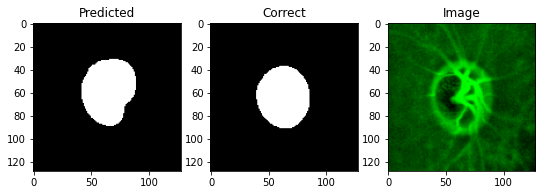

IOU: 0.7438231706619263
Dice: 0.8530947054436987
image #1


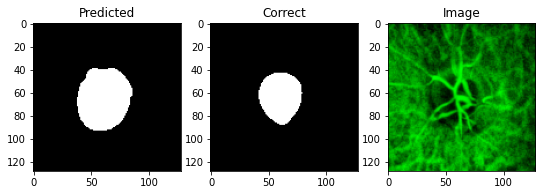

IOU: 0.6279980540275574
Dice: 0.7714972940469031
image #2


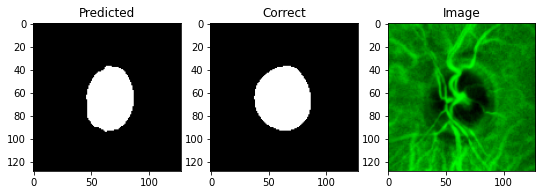

IOU: 0.8259464502334595
Dice: 0.9046776232616941
image #3


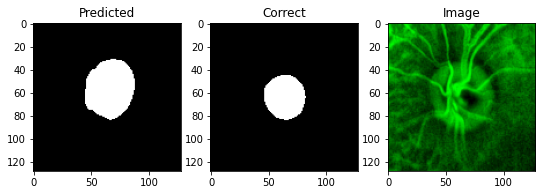

IOU: 0.600566565990448
Dice: 0.7504424778761062
image #4


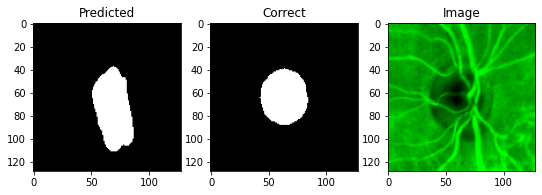

IOU: 0.5358114242553711
Dice: 0.6977567886658795
image #5


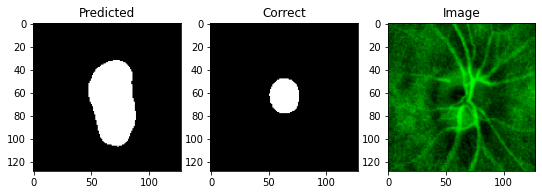

IOU: 0.26746678352355957
Dice: 0.4220493743659114
image #6


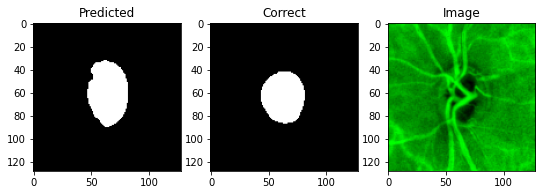

IOU: 0.7530339956283569
Dice: 0.8591208030460367
image #7


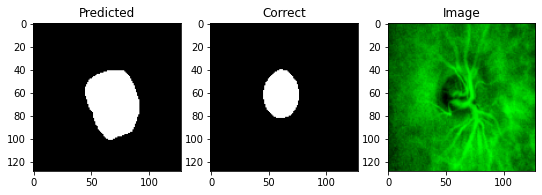

IOU: 0.4593077600002289
Dice: 0.6294871794871795
image #8


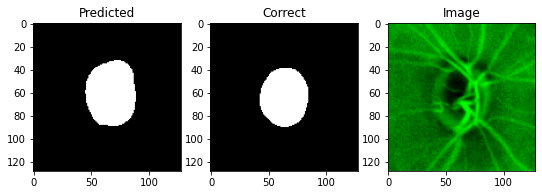

IOU: 0.7491764426231384
Dice: 0.8566047888081786
image #9


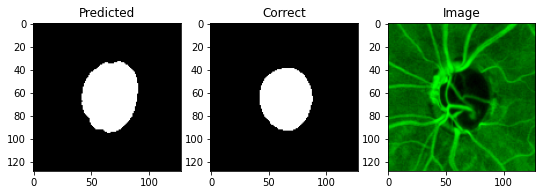

IOU: 0.8324742317199707
Dice: 0.9085794655414908
image #10


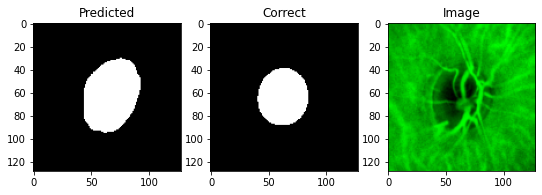

IOU: 0.6674718260765076
Dice: 0.8005794302269436
image #11


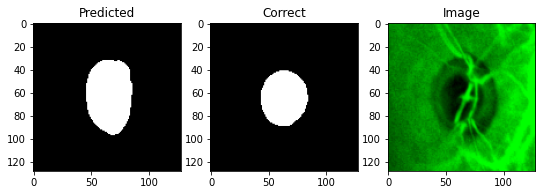

IOU: 0.6933830380439758
Dice: 0.8189323059988993
image #12


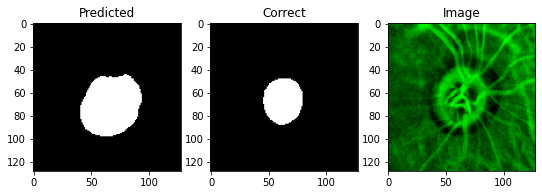

IOU: 0.4907449185848236
Dice: 0.658388855239249
image #13


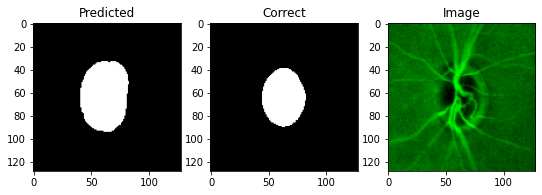

IOU: 0.6908051371574402
Dice: 0.8171315863623556
image #14


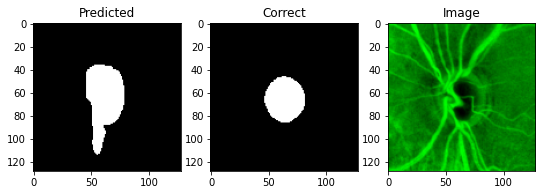

IOU: 0.5646923780441284
Dice: 0.7217934582873944
image #15


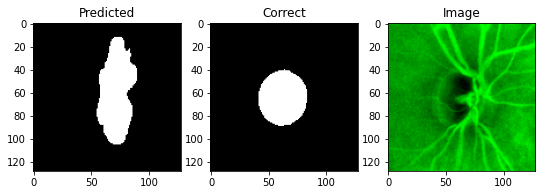

IOU: 0.3931339979171753
Dice: 0.5643879173290938
image #16


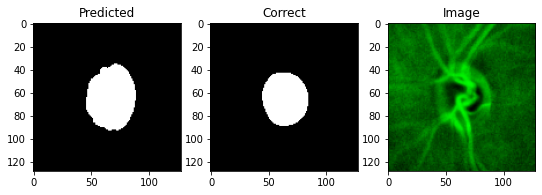

IOU: 0.7471502423286438
Dice: 0.8552787663107948
image #17


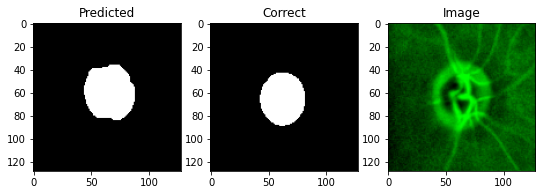

IOU: 0.6595059037208557
Dice: 0.7948220064724919
image #18


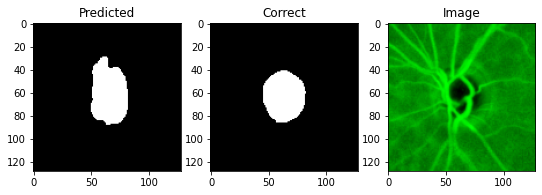

IOU: 0.7338811755180359
Dice: 0.8465184104994532
image #19


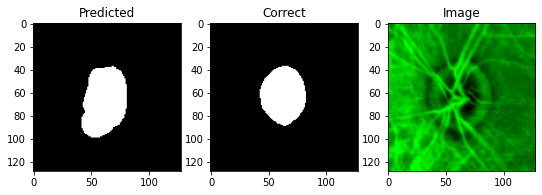

IOU: 0.7407781481742859
Dice: 0.851088534107402
image #20


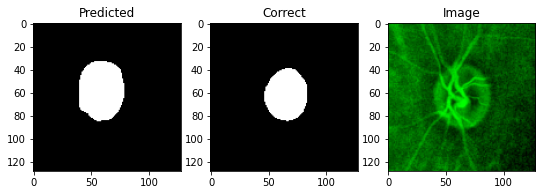

IOU: 0.5840848684310913
Dice: 0.7374413931681179
image #21


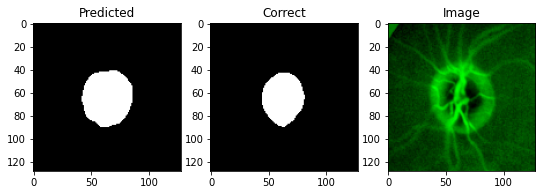

IOU: 0.7551500797271729
Dice: 0.8604963112005366
image #22


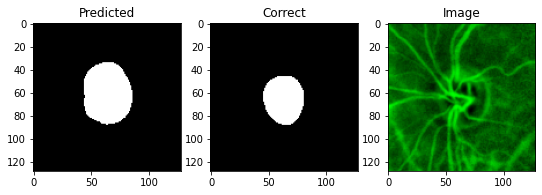

IOU: 0.6383904218673706
Dice: 0.7792897444407567
image #23


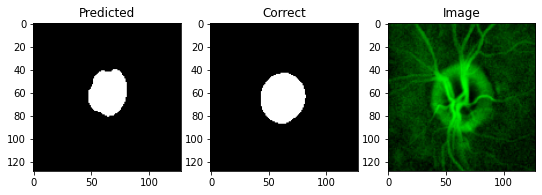

IOU: 0.6828225255012512
Dice: 0.8115205421431597
image #24


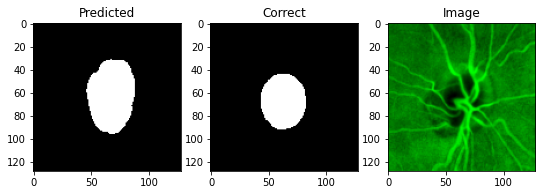

IOU: 0.6359068155288696
Dice: 0.777436470259704
image #25


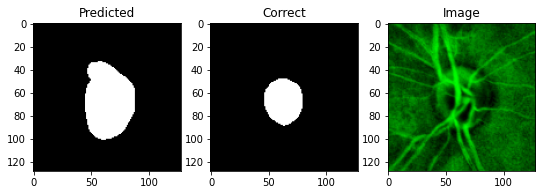

IOU: 0.4641442894935608
Dice: 0.6340144230769231
image #26


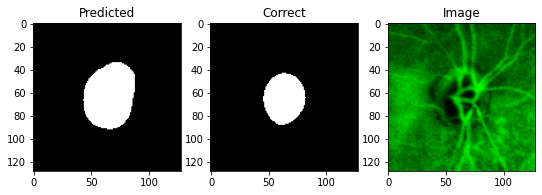

IOU: 0.6092292666435242
Dice: 0.7571690054911532
image #27


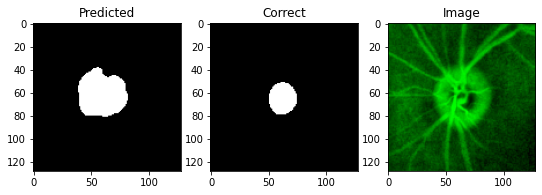

IOU: 0.38345324993133545
Dice: 0.5543421736869475
image #28


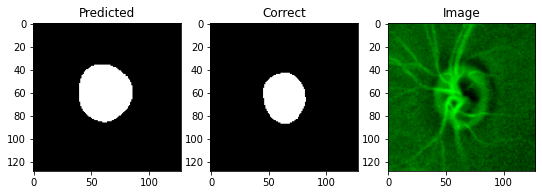

IOU: 0.6566362380981445
Dice: 0.7927343496594227
image #29


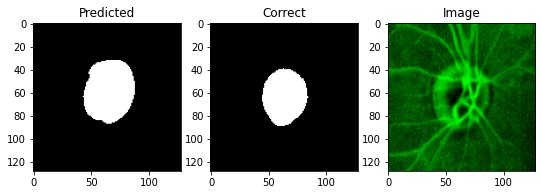

IOU: 0.7253912091255188
Dice: 0.8408425980105325
image #30


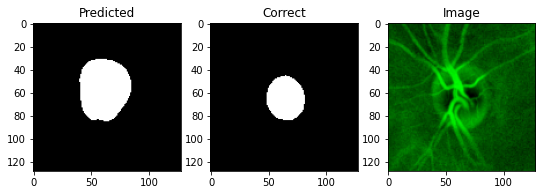

IOU: 0.47310206294059753
Dice: 0.642320819112628
image #31


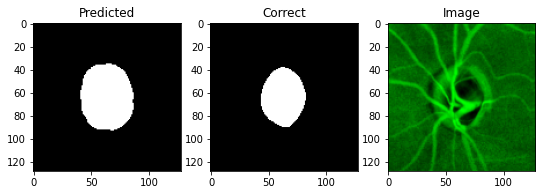

IOU: 0.6979118585586548
Dice: 0.8220825362120798
image #32


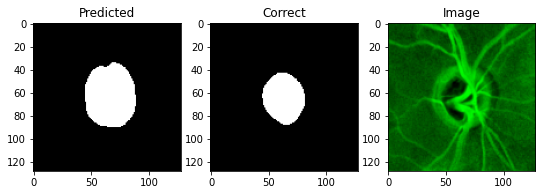

IOU: 0.6260040402412415
Dice: 0.7699907378820624
image #33


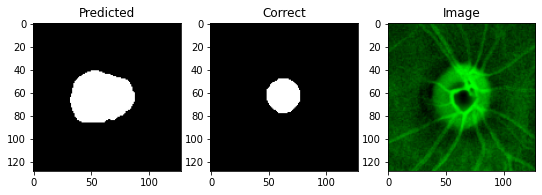

IOU: 0.34809160232543945
Dice: 0.5164212910532276
image #34


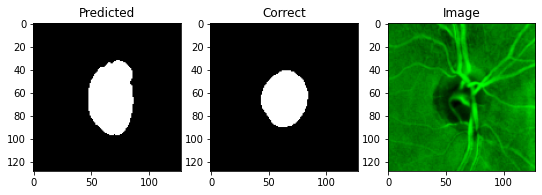

IOU: 0.6913105845451355
Dice: 0.8174850979279024
image #35


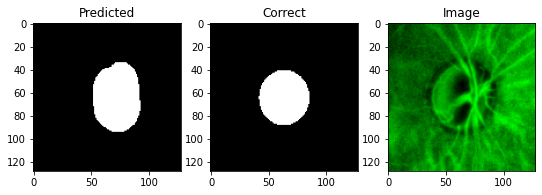

IOU: 0.5601713061332703
Dice: 0.7180894866867966
image #36


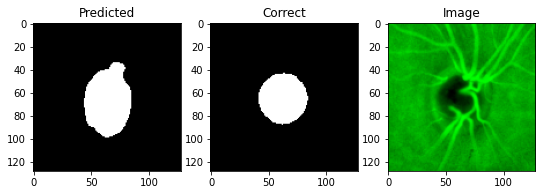

IOU: 0.6942927837371826
Dice: 0.8195664909197422
image #37


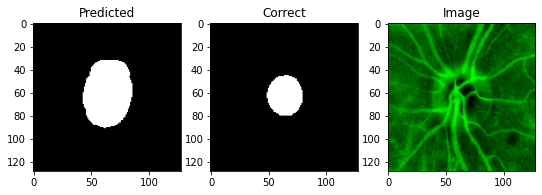

IOU: 0.4224095046520233
Dice: 0.5939351690484489
image #38


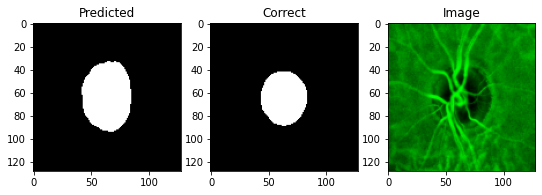

IOU: 0.7140790820121765
Dice: 0.8331926863572433
image #39


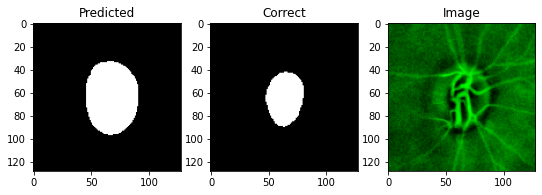

IOU: 0.5079365372657776
Dice: 0.6736842105263158
image #40


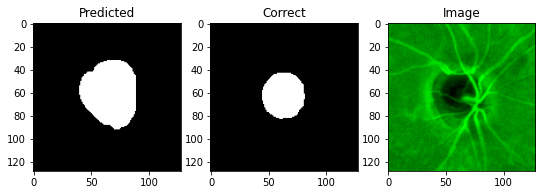

IOU: 0.5192904472351074
Dice: 0.6835960303561004
image #41


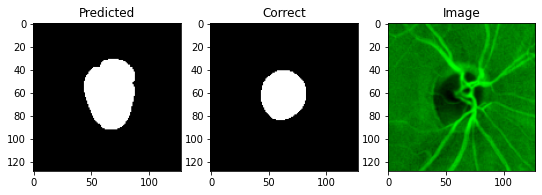

IOU: 0.6060889959335327
Dice: 0.7547389909594634
image #42


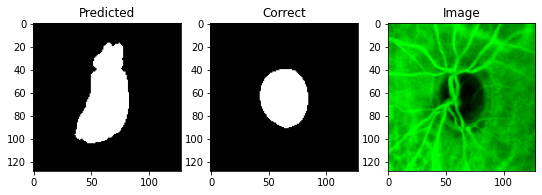

IOU: 0.5409188866615295
Dice: 0.7020731423247146
image #43


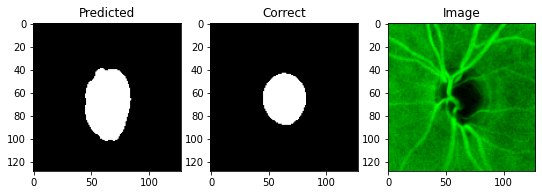

IOU: 0.6637576818466187
Dice: 0.7979018821351435
image #44


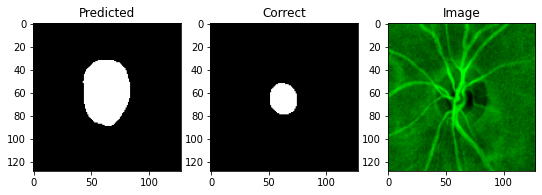

IOU: 0.2729700803756714
Dice: 0.42887117079311793
image #45


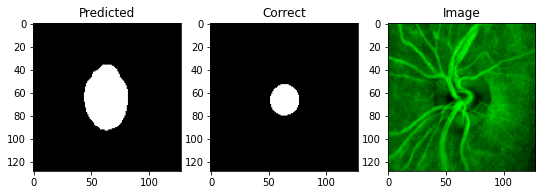

IOU: 0.3259938955307007
Dice: 0.49169741697416974
image #46


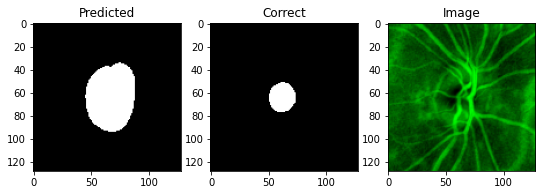

IOU: 0.2308070808649063
Dice: 0.3750499800079968
image #47


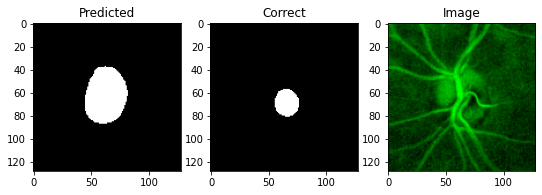

IOU: 0.2780112028121948
Dice: 0.4350684931506849
image #48


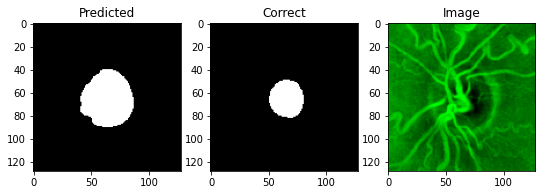

IOU: 0.4423516094684601
Dice: 0.6133755441234665
image #49


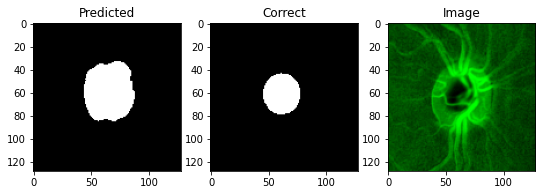

IOU: 0.4862087666988373
Dice: 0.6542940320232896
image #50


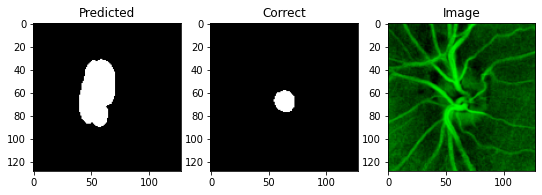

IOU: 0.12550607323646545
Dice: 0.22302158273381295


In [9]:
pred_iou, pred_dice, pred_cup = predict(lab_a_channel_test, X_test, Y_test, model, img_size)

In [10]:
print(np.mean(pred_iou))
print(np.mean(pred_dice))

0.5713642
0.7116465798788787


### Training and Test disc

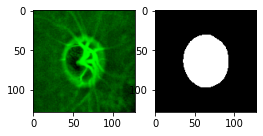

In [11]:
X_test, Z_test = next(data_generator(lab_a_channel_test, disc_test, disc_locations_test, img_size, train_or_test='test', batch_size=100, stationary=True))

num = 1
for i in range(num):
    fig = plt.figure(figsize=(4, 4))
    ax = fig.add_subplot(1, 2, 1)
    ax.imshow(np.squeeze(X_test[i]), cmap=plt.cm.Greys_r)
    ax = fig.add_subplot(1, 2, 2)
    ax.imshow(np.squeeze(Z_test[i]), cmap=plt.cm.Greys_r)
    plt.show()
    print('=========================')

In [12]:
model_disc = create_compile_model(img_size)

history_disc = train(lab_a_channel_train, 
                     disc_train, 
                     disc_locations, 
                     'disc_lab_a', 
                     model_disc, epochs, X_test, Z_test, img_size, spe)

Epoch 1/500
99/99 [==============================] - 44s 425ms/step - loss: 1.0175 - mean_IOU_gpu: 0.1361 - dice_metric: 0.2391 - val_loss: 1.0042 - val_mean_IOU_gpu: 5.9225e-04 - val_dice_metric: 0.0012
Epoch 2/500
99/99 [==============================] - 42s 427ms/step - loss: 1.0197 - mean_IOU_gpu: 0.0741 - dice_metric: 0.1366 - val_loss: 0.9983 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 3/500
99/99 [==============================] - 39s 390ms/step - loss: 0.9906 - mean_IOU_gpu: 0.0125 - dice_metric: 0.0246 - val_loss: 0.9927 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 4/500
99/99 [==============================] - 36s 369ms/step - loss: 0.9959 - mean_IOU_gpu: 9.3023e-04 - dice_metric: 0.0019 - val_loss: 0.9863 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 5/500
99/99 [==============================] - 42s 427ms/step - loss: 0.9802 - mean_IOU_gpu: 6.1034e-05 - dice_metric: 1.2201e-04 - val_loss: 0.9808 - val_mean_IO

Epoch 40/500
99/99 [==============================] - 32s 328ms/step - loss: 0.2415 - mean_IOU_gpu: 0.6206 - dice_metric: 0.7591 - val_loss: 2.9854 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 41/500
99/99 [==============================] - 32s 327ms/step - loss: 0.2358 - mean_IOU_gpu: 0.6241 - dice_metric: 0.7615 - val_loss: 3.0789 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 42/500
99/99 [==============================] - 33s 332ms/step - loss: 0.1958 - mean_IOU_gpu: 0.6555 - dice_metric: 0.7881 - val_loss: 3.3108 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 43/500
99/99 [==============================] - 33s 329ms/step - loss: 0.2168 - mean_IOU_gpu: 0.6313 - dice_metric: 0.7694 - val_loss: 3.2445 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 44/500
99/99 [==============================] - 32s 328ms/step - loss: 0.2167 - mean_IOU_gpu: 0.6346 - dice_metric: 0.7711 - val_loss: 3.0570 - val_mean_IOU_g

Epoch 80/500
99/99 [==============================] - 32s 328ms/step - loss: 0.1411 - mean_IOU_gpu: 0.7275 - dice_metric: 0.8393 - val_loss: 0.8400 - val_mean_IOU_gpu: 0.1777 - val_dice_metric: 0.2778
Epoch 81/500
99/99 [==============================] - 33s 333ms/step - loss: 0.1307 - mean_IOU_gpu: 0.7451 - dice_metric: 0.8508 - val_loss: 0.7032 - val_mean_IOU_gpu: 0.2517 - val_dice_metric: 0.3690
Epoch 82/500
99/99 [==============================] - 33s 330ms/step - loss: 0.1341 - mean_IOU_gpu: 0.7401 - dice_metric: 0.8473 - val_loss: 0.5526 - val_mean_IOU_gpu: 0.3758 - val_dice_metric: 0.4880
Epoch 83/500
99/99 [==============================] - 33s 333ms/step - loss: 0.1370 - mean_IOU_gpu: 0.7358 - dice_metric: 0.8434 - val_loss: 0.7347 - val_mean_IOU_gpu: 0.2342 - val_dice_metric: 0.3518
Epoch 84/500
99/99 [==============================] - 33s 332ms/step - loss: 0.1335 - mean_IOU_gpu: 0.7381 - dice_metric: 0.8465 - val_loss: 0.4879 - val_mean_IOU_gpu: 0.3956 - val_dice_metric: 0.

Epoch 121/500
99/99 [==============================] - 33s 329ms/step - loss: 0.1123 - mean_IOU_gpu: 0.7696 - dice_metric: 0.8671 - val_loss: 0.0988 - val_mean_IOU_gpu: 0.7838 - val_dice_metric: 0.8760
Epoch 122/500
99/99 [==============================] - 34s 346ms/step - loss: 0.1129 - mean_IOU_gpu: 0.7707 - dice_metric: 0.8678 - val_loss: 0.1166 - val_mean_IOU_gpu: 0.7522 - val_dice_metric: 0.8559
Epoch 123/500
99/99 [==============================] - 36s 364ms/step - loss: 0.1234 - mean_IOU_gpu: 0.7521 - dice_metric: 0.8552 - val_loss: 0.1271 - val_mean_IOU_gpu: 0.7335 - val_dice_metric: 0.8437
Epoch 124/500
99/99 [==============================] - 33s 332ms/step - loss: 0.1212 - mean_IOU_gpu: 0.7594 - dice_metric: 0.8598 - val_loss: 0.0769 - val_mean_IOU_gpu: 0.8386 - val_dice_metric: 0.9087
Epoch 125/500
99/99 [==============================] - 33s 334ms/step - loss: 0.1106 - mean_IOU_gpu: 0.7707 - dice_metric: 0.8681 - val_loss: 0.0993 - val_mean_IOU_gpu: 0.7865 - val_dice_metri

99/99 [==============================] - 32s 323ms/step - loss: 0.1098 - mean_IOU_gpu: 0.7704 - dice_metric: 0.8682 - val_loss: 0.1505 - val_mean_IOU_gpu: 0.7049 - val_dice_metric: 0.8239
Epoch 162/500
99/99 [==============================] - 33s 333ms/step - loss: 0.1002 - mean_IOU_gpu: 0.7876 - dice_metric: 0.8793 - val_loss: 0.1129 - val_mean_IOU_gpu: 0.7653 - val_dice_metric: 0.8640
Epoch 163/500
99/99 [==============================] - 33s 330ms/step - loss: 0.1267 - mean_IOU_gpu: 0.7560 - dice_metric: 0.8563 - val_loss: 0.1339 - val_mean_IOU_gpu: 0.7268 - val_dice_metric: 0.8390
Epoch 164/500
99/99 [==============================] - 33s 333ms/step - loss: 0.1281 - mean_IOU_gpu: 0.7467 - dice_metric: 0.8514 - val_loss: 0.1186 - val_mean_IOU_gpu: 0.7515 - val_dice_metric: 0.8557
Epoch 165/500
99/99 [==============================] - 33s 329ms/step - loss: 0.1023 - mean_IOU_gpu: 0.7871 - dice_metric: 0.8788 - val_loss: 0.1374 - val_mean_IOU_gpu: 0.7240 - val_dice_metric: 0.8373
Epoc

Epoch 202/500
99/99 [==============================] - 34s 344ms/step - loss: 0.0871 - mean_IOU_gpu: 0.8079 - dice_metric: 0.8926 - val_loss: 0.1360 - val_mean_IOU_gpu: 0.7436 - val_dice_metric: 0.8473
Epoch 203/500
99/99 [==============================] - 34s 339ms/step - loss: 0.0943 - mean_IOU_gpu: 0.7991 - dice_metric: 0.8862 - val_loss: 0.1365 - val_mean_IOU_gpu: 0.7421 - val_dice_metric: 0.8461
Epoch 204/500
99/99 [==============================] - 34s 340ms/step - loss: 0.0884 - mean_IOU_gpu: 0.8084 - dice_metric: 0.8922 - val_loss: 0.1712 - val_mean_IOU_gpu: 0.6897 - val_dice_metric: 0.8080
Epoch 205/500
99/99 [==============================] - 33s 330ms/step - loss: 0.0958 - mean_IOU_gpu: 0.7960 - dice_metric: 0.8843 - val_loss: 0.1662 - val_mean_IOU_gpu: 0.7172 - val_dice_metric: 0.8164
Epoch 206/500
99/99 [==============================] - 33s 330ms/step - loss: 0.0801 - mean_IOU_gpu: 0.8244 - dice_metric: 0.9020 - val_loss: 0.1810 - val_mean_IOU_gpu: 0.6942 - val_dice_metri

99/99 [==============================] - 33s 330ms/step - loss: 0.0827 - mean_IOU_gpu: 0.8193 - dice_metric: 0.8989 - val_loss: 0.1904 - val_mean_IOU_gpu: 0.6646 - val_dice_metric: 0.7947
Epoch 243/500
99/99 [==============================] - 33s 331ms/step - loss: 0.0787 - mean_IOU_gpu: 0.8244 - dice_metric: 0.9026 - val_loss: 0.1436 - val_mean_IOU_gpu: 0.7248 - val_dice_metric: 0.8371
Epoch 244/500
99/99 [==============================] - 33s 333ms/step - loss: 0.0813 - mean_IOU_gpu: 0.8218 - dice_metric: 0.9005 - val_loss: 0.1902 - val_mean_IOU_gpu: 0.6584 - val_dice_metric: 0.7906
Epoch 245/500
99/99 [==============================] - 34s 347ms/step - loss: 0.0803 - mean_IOU_gpu: 0.8250 - dice_metric: 0.9023 - val_loss: 0.1533 - val_mean_IOU_gpu: 0.7106 - val_dice_metric: 0.8274
Epoch 246/500
99/99 [==============================] - 34s 343ms/step - loss: 0.0765 - mean_IOU_gpu: 0.8307 - dice_metric: 0.9058 - val_loss: 0.1769 - val_mean_IOU_gpu: 0.6810 - val_dice_metric: 0.8067
Epoc

Epoch 283/500
99/99 [==============================] - 32s 323ms/step - loss: 0.0683 - mean_IOU_gpu: 0.8479 - dice_metric: 0.9161 - val_loss: 0.2252 - val_mean_IOU_gpu: 0.6198 - val_dice_metric: 0.7622
Epoch 284/500
99/99 [==============================] - 32s 326ms/step - loss: 0.0740 - mean_IOU_gpu: 0.8339 - dice_metric: 0.9081 - val_loss: 0.2257 - val_mean_IOU_gpu: 0.6235 - val_dice_metric: 0.7652
Epoch 285/500
99/99 [==============================] - 33s 334ms/step - loss: 0.0744 - mean_IOU_gpu: 0.8317 - dice_metric: 0.9070 - val_loss: 0.2130 - val_mean_IOU_gpu: 0.6366 - val_dice_metric: 0.7749
Epoch 286/500
99/99 [==============================] - 32s 323ms/step - loss: 0.0694 - mean_IOU_gpu: 0.8428 - dice_metric: 0.9136 - val_loss: 0.2341 - val_mean_IOU_gpu: 0.6097 - val_dice_metric: 0.7545
Epoch 287/500
99/99 [==============================] - 32s 321ms/step - loss: 0.0647 - mean_IOU_gpu: 0.8505 - dice_metric: 0.9185 - val_loss: 0.2076 - val_mean_IOU_gpu: 0.6372 - val_dice_metri

99/99 [==============================] - 34s 340ms/step - loss: 0.0654 - mean_IOU_gpu: 0.8515 - dice_metric: 0.9184 - val_loss: 0.2137 - val_mean_IOU_gpu: 0.6329 - val_dice_metric: 0.7722
Epoch 324/500
99/99 [==============================] - 33s 333ms/step - loss: 0.0721 - mean_IOU_gpu: 0.8385 - dice_metric: 0.9107 - val_loss: 0.2720 - val_mean_IOU_gpu: 0.5690 - val_dice_metric: 0.7227
Epoch 325/500
99/99 [==============================] - 33s 330ms/step - loss: 0.0704 - mean_IOU_gpu: 0.8406 - dice_metric: 0.9122 - val_loss: 0.2849 - val_mean_IOU_gpu: 0.5550 - val_dice_metric: 0.7112
Epoch 326/500
99/99 [==============================] - 32s 325ms/step - loss: 0.0690 - mean_IOU_gpu: 0.8449 - dice_metric: 0.9147 - val_loss: 0.1625 - val_mean_IOU_gpu: 0.6927 - val_dice_metric: 0.8154
Epoch 327/500
99/99 [==============================] - 33s 333ms/step - loss: 0.0734 - mean_IOU_gpu: 0.8351 - dice_metric: 0.9087 - val_loss: 0.2758 - val_mean_IOU_gpu: 0.5599 - val_dice_metric: 0.7153
Epoc

Epoch 364/500
99/99 [==============================] - 33s 331ms/step - loss: 0.0701 - mean_IOU_gpu: 0.8434 - dice_metric: 0.9137 - val_loss: 0.2053 - val_mean_IOU_gpu: 0.6411 - val_dice_metric: 0.7782
Epoch 365/500
99/99 [==============================] - 33s 330ms/step - loss: 0.0625 - mean_IOU_gpu: 0.8556 - dice_metric: 0.9211 - val_loss: 0.2404 - val_mean_IOU_gpu: 0.6025 - val_dice_metric: 0.7488
Epoch 366/500
99/99 [==============================] - 32s 327ms/step - loss: 0.0636 - mean_IOU_gpu: 0.8549 - dice_metric: 0.9207 - val_loss: 0.2394 - val_mean_IOU_gpu: 0.5989 - val_dice_metric: 0.7460
Epoch 367/500
99/99 [==============================] - 32s 328ms/step - loss: 0.0702 - mean_IOU_gpu: 0.8409 - dice_metric: 0.9123 - val_loss: 0.2134 - val_mean_IOU_gpu: 0.6362 - val_dice_metric: 0.7740
Epoch 368/500
99/99 [==============================] - 34s 342ms/step - loss: 0.0668 - mean_IOU_gpu: 0.8488 - dice_metric: 0.9170 - val_loss: 0.2397 - val_mean_IOU_gpu: 0.5985 - val_dice_metri

99/99 [==============================] - 33s 333ms/step - loss: 0.0642 - mean_IOU_gpu: 0.8520 - dice_metric: 0.9192 - val_loss: 0.1976 - val_mean_IOU_gpu: 0.6525 - val_dice_metric: 0.7862
Epoch 405/500
99/99 [==============================] - 32s 328ms/step - loss: 0.0651 - mean_IOU_gpu: 0.8533 - dice_metric: 0.9196 - val_loss: 0.2391 - val_mean_IOU_gpu: 0.6022 - val_dice_metric: 0.7482
Epoch 406/500
99/99 [==============================] - 32s 325ms/step - loss: 0.0687 - mean_IOU_gpu: 0.8436 - dice_metric: 0.9140 - val_loss: 0.2149 - val_mean_IOU_gpu: 0.6322 - val_dice_metric: 0.7709
Epoch 407/500
99/99 [==============================] - 33s 331ms/step - loss: 0.0642 - mean_IOU_gpu: 0.8530 - dice_metric: 0.9196 - val_loss: 0.2515 - val_mean_IOU_gpu: 0.5884 - val_dice_metric: 0.7375
Epoch 408/500
99/99 [==============================] - 33s 330ms/step - loss: 0.0620 - mean_IOU_gpu: 0.8565 - dice_metric: 0.9218 - val_loss: 0.2263 - val_mean_IOU_gpu: 0.6209 - val_dice_metric: 0.7623
Epoc

Epoch 445/500
99/99 [==============================] - 34s 342ms/step - loss: 0.0578 - mean_IOU_gpu: 0.8653 - dice_metric: 0.9270 - val_loss: 0.1783 - val_mean_IOU_gpu: 0.6663 - val_dice_metric: 0.7963
Epoch 446/500
99/99 [==============================] - 32s 323ms/step - loss: 0.0644 - mean_IOU_gpu: 0.8556 - dice_metric: 0.9206 - val_loss: 0.2480 - val_mean_IOU_gpu: 0.6028 - val_dice_metric: 0.7493
Epoch 447/500
99/99 [==============================] - 33s 331ms/step - loss: 0.0706 - mean_IOU_gpu: 0.8425 - dice_metric: 0.9130 - val_loss: 0.2195 - val_mean_IOU_gpu: 0.6286 - val_dice_metric: 0.7686
Epoch 448/500
99/99 [==============================] - 33s 330ms/step - loss: 0.0657 - mean_IOU_gpu: 0.8516 - dice_metric: 0.9185 - val_loss: 0.1988 - val_mean_IOU_gpu: 0.6509 - val_dice_metric: 0.7854
Epoch 449/500
99/99 [==============================] - 32s 327ms/step - loss: 0.0613 - mean_IOU_gpu: 0.8590 - dice_metric: 0.9231 - val_loss: 0.3285 - val_mean_IOU_gpu: 0.5192 - val_dice_metri

99/99 [==============================] - 34s 349ms/step - loss: 0.0537 - mean_IOU_gpu: 0.8728 - dice_metric: 0.9313 - val_loss: 0.2398 - val_mean_IOU_gpu: 0.6006 - val_dice_metric: 0.7473
Epoch 486/500
99/99 [==============================] - 33s 329ms/step - loss: 0.0636 - mean_IOU_gpu: 0.8571 - dice_metric: 0.9215 - val_loss: 0.2750 - val_mean_IOU_gpu: 0.5647 - val_dice_metric: 0.7186
Epoch 487/500
99/99 [==============================] - 32s 326ms/step - loss: 0.0598 - mean_IOU_gpu: 0.8615 - dice_metric: 0.9246 - val_loss: 0.1750 - val_mean_IOU_gpu: 0.6766 - val_dice_metric: 0.8038
Epoch 488/500
99/99 [==============================] - 33s 331ms/step - loss: 0.0605 - mean_IOU_gpu: 0.8611 - dice_metric: 0.9242 - val_loss: 0.1862 - val_mean_IOU_gpu: 0.6594 - val_dice_metric: 0.7913
Epoch 489/500
99/99 [==============================] - 33s 338ms/step - loss: 0.0601 - mean_IOU_gpu: 0.8604 - dice_metric: 0.9240 - val_loss: 0.2324 - val_mean_IOU_gpu: 0.6034 - val_dice_metric: 0.7491
Epoc

image #0


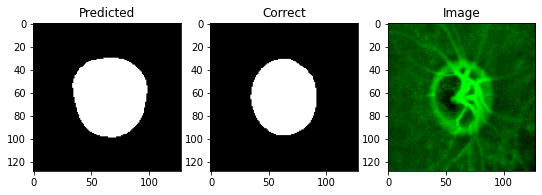

IOU: 0.8302894234657288
Dice: 0.907276634940129
image #1


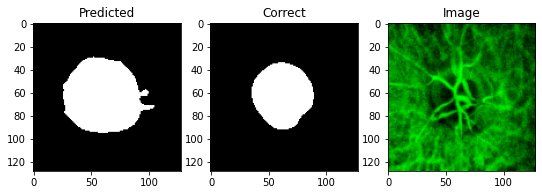

IOU: 0.6425802707672119
Dice: 0.7824035058149335
image #2


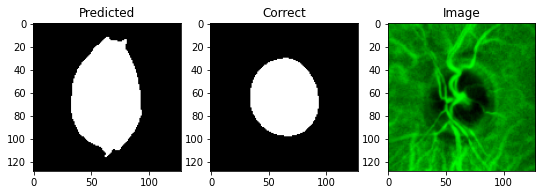

IOU: 0.6961350440979004
Dice: 0.820848611838659
image #3


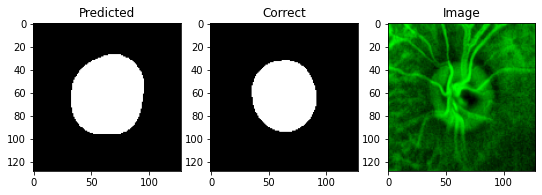

IOU: 0.7707631587982178
Dice: 0.8705434954840754
image #4


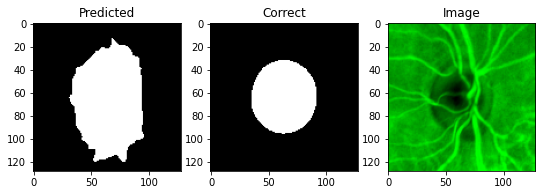

IOU: 0.5797633528709412
Dice: 0.7339876033057852
image #5


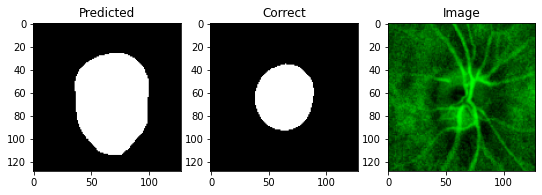

IOU: 0.5023061633110046
Dice: 0.6687134502923977
image #6


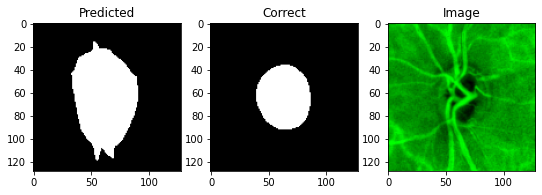

IOU: 0.5358151197433472
Dice: 0.6977599465061852
image #7


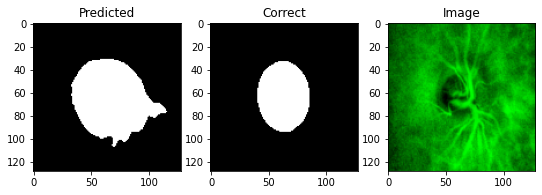

IOU: 0.5679333806037903
Dice: 0.7244355909694555
image #8


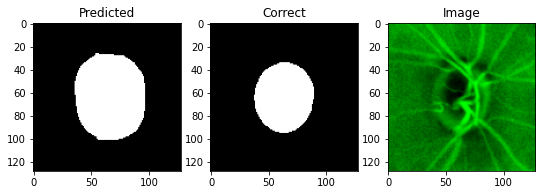

IOU: 0.6511504650115967
Dice: 0.7887233701745956
image #9


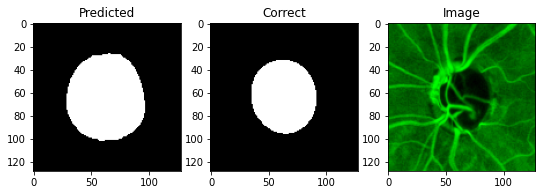

IOU: 0.6979421973228455
Dice: 0.8221035925551868
image #10


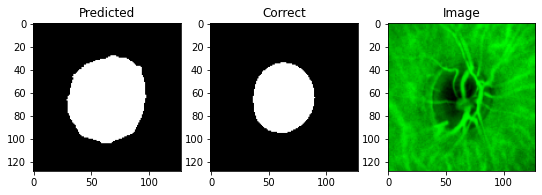

IOU: 0.6348496079444885
Dice: 0.7766458871826061
image #11


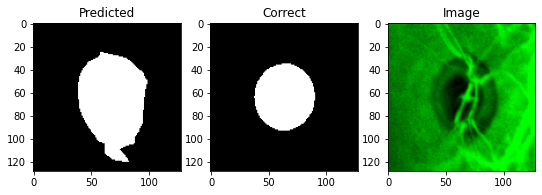

IOU: 0.5964159369468689
Dice: 0.7471936758893281
image #12


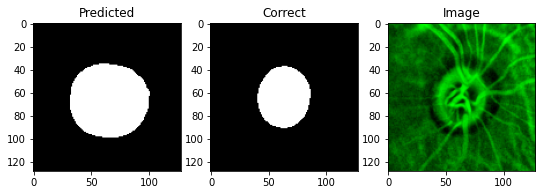

IOU: 0.542655348777771
Dice: 0.703534151254349
image #13


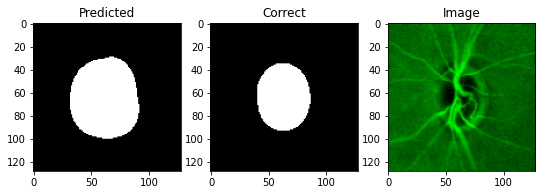

IOU: 0.6328743100166321
Dice: 0.7751659788264849
image #14


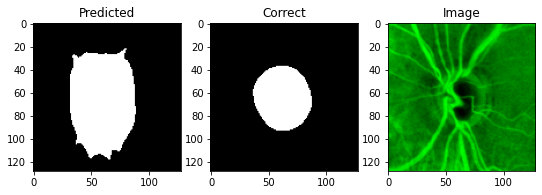

IOU: 0.5091202855110168
Dice: 0.6747246022031824
image #15


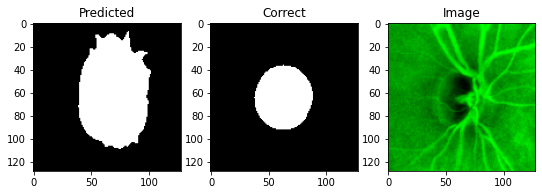

IOU: 0.45388147234916687
Dice: 0.6243720396153294
image #16


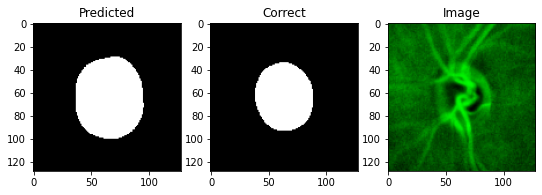

IOU: 0.6915204524993896
Dice: 0.8176318063958513
image #17


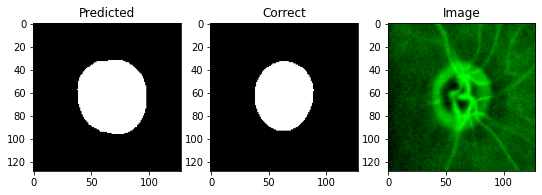

IOU: 0.767754316329956
Dice: 0.8686210640608035
image #18


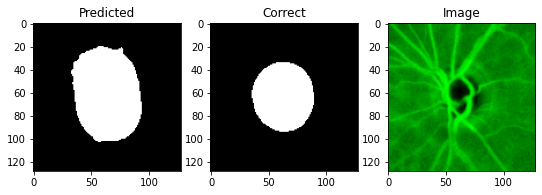

IOU: 0.6418135762214661
Dice: 0.7818349186867137
image #19


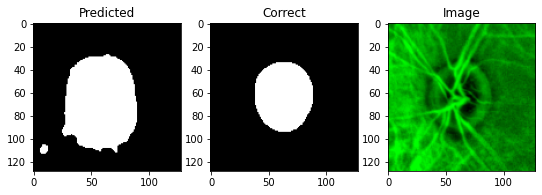

IOU: 0.5566774010658264
Dice: 0.7152122641509434
image #20


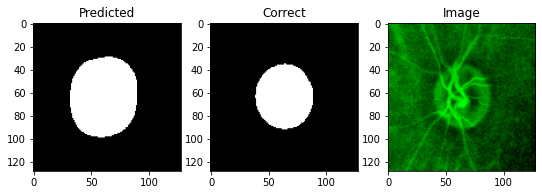

IOU: 0.6617646813392639
Dice: 0.7964601769911505
image #21


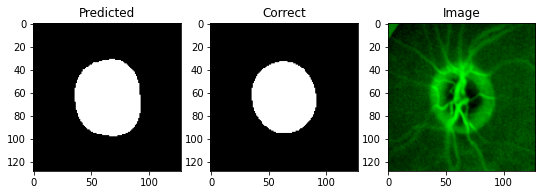

IOU: 0.8805537819862366
Dice: 0.9364834788563602
image #22


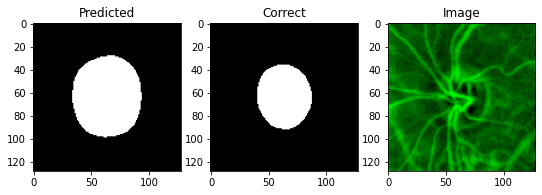

IOU: 0.6119096279144287
Dice: 0.759235668789809
image #23


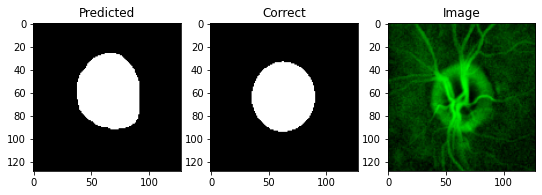

IOU: 0.7893533706665039
Dice: 0.8822777879175032
image #24


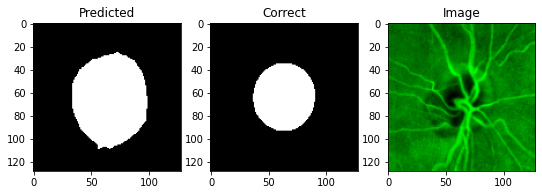

IOU: 0.5951067209243774
Dice: 0.7461654135338346
image #25


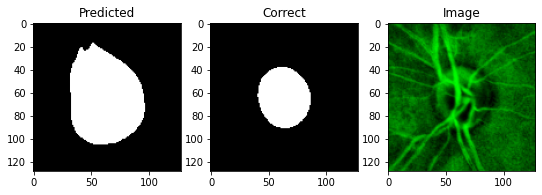

IOU: 0.434883177280426
Dice: 0.6061583104949219
image #26


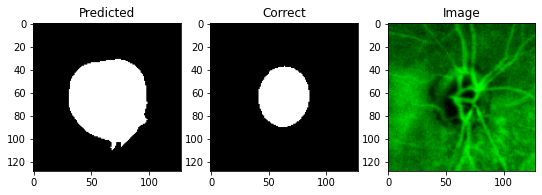

IOU: 0.4594457149505615
Dice: 0.6296167247386759
image #27


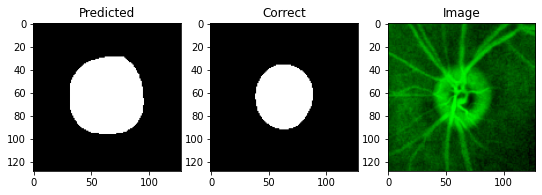

IOU: 0.6166152358055115
Dice: 0.7628472222222222
image #28


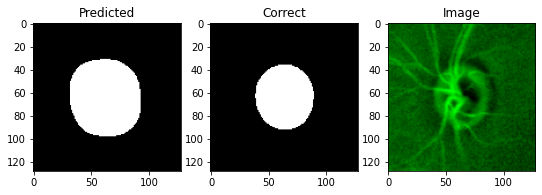

IOU: 0.6586721539497375
Dice: 0.7942161876212308
image #29


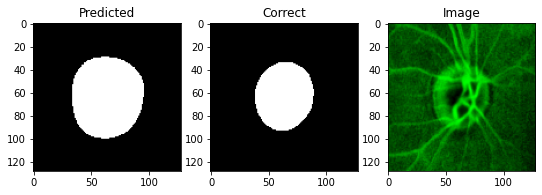

IOU: 0.6642356514930725
Dice: 0.7982470925332884
image #30


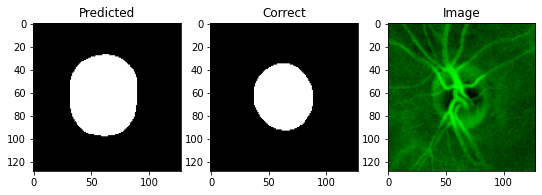

IOU: 0.6809565424919128
Dice: 0.8102012491325469
image #31


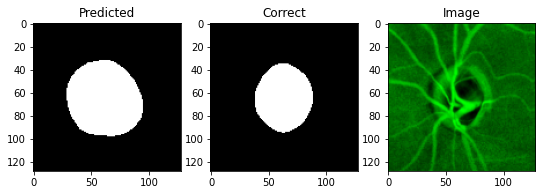

IOU: 0.6632652878761292
Dice: 0.7975460122699386
image #32


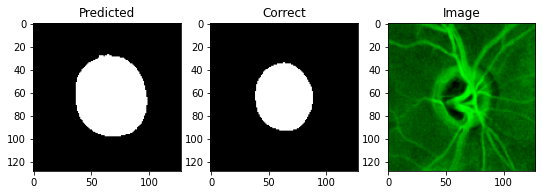

IOU: 0.6586483120918274
Dice: 0.7941988950276243
image #33


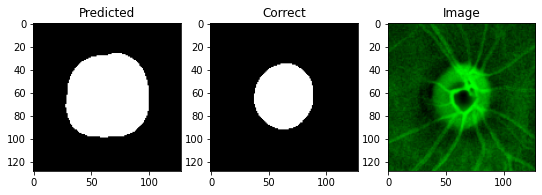

IOU: 0.5266067981719971
Dice: 0.6899049343594387
image #34


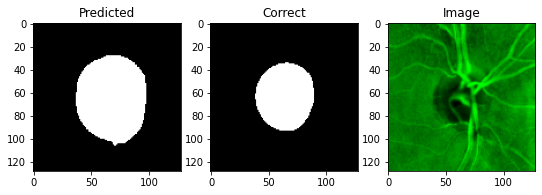

IOU: 0.6309587359428406
Dice: 0.773727422003284
image #35


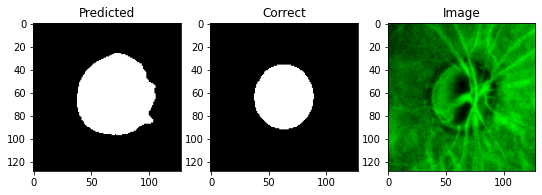

IOU: 0.6104949712753296
Dice: 0.7581457843466577
image #36


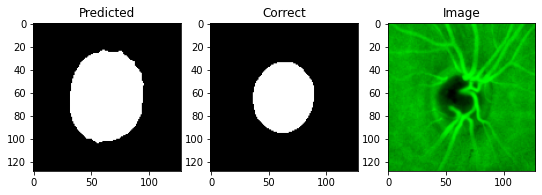

IOU: 0.6267518997192383
Dice: 0.7705562273276905
image #37


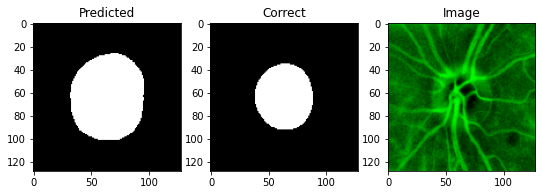

IOU: 0.5828205347061157
Dice: 0.7364328527458286
image #38


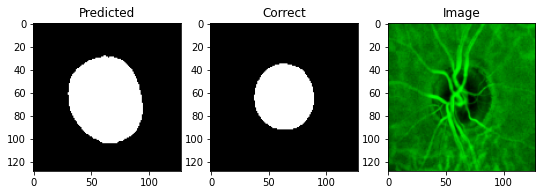

IOU: 0.6158504486083984
Dice: 0.7622616913801532
image #39


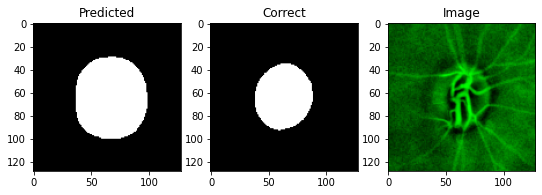

IOU: 0.6120547652244568
Dice: 0.7593473827328348
image #40


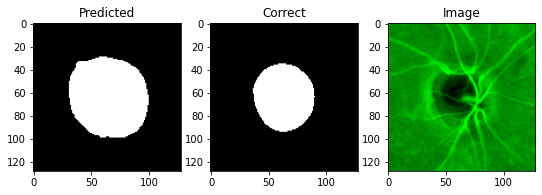

IOU: 0.620398759841919
Dice: 0.7657359204921912
image #41


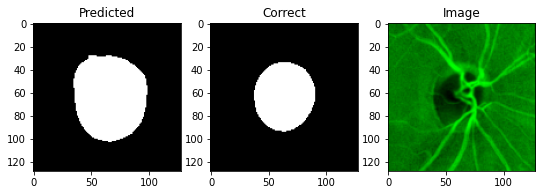

IOU: 0.6449011564254761
Dice: 0.7841214613316464
image #42


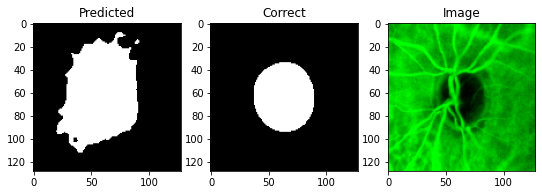

IOU: 0.5079846382141113
Dice: 0.6737265415549598
image #43


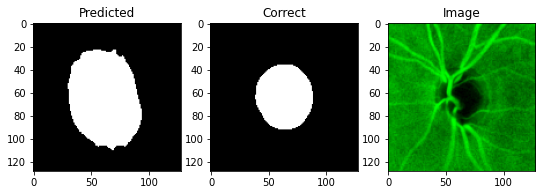

IOU: 0.5189545750617981
Dice: 0.6833049139668268
image #44


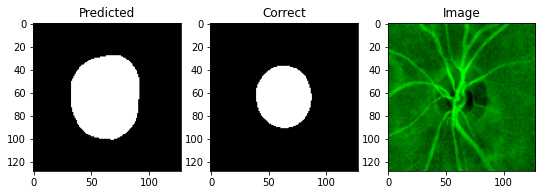

IOU: 0.5740792751312256
Dice: 0.7294159671369888
image #45


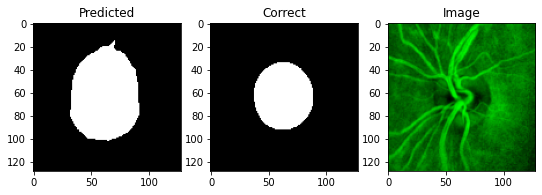

IOU: 0.6087737083435059
Dice: 0.7568170945622708
image #46


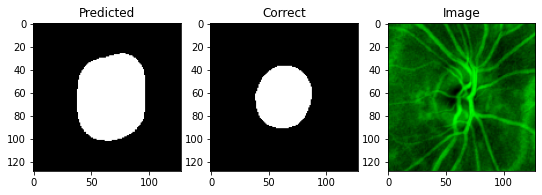

IOU: 0.5564129948616028
Dice: 0.7149940160711232
image #47


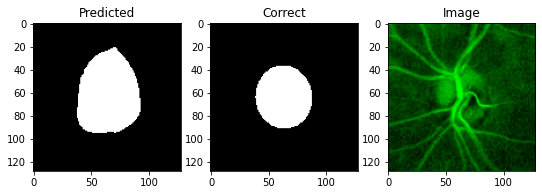

IOU: 0.6662428379058838
Dice: 0.7996947729874094
image #48


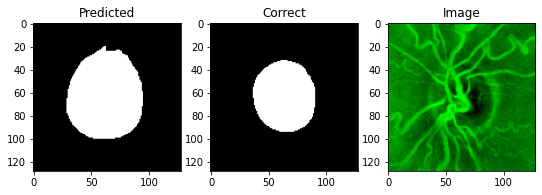

IOU: 0.6505612730979919
Dice: 0.7882909520993495
image #49


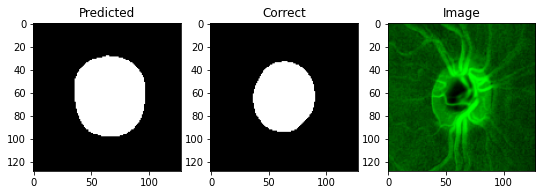

IOU: 0.7277114987373352
Dice: 0.8423993426458505
image #50


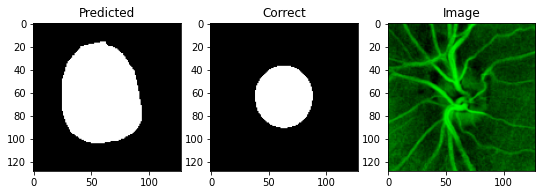

IOU: 0.4355171024799347
Dice: 0.6067738231917337


In [13]:
pred_iou, pred_dice, pred_disc = predict(lab_a_channel_test, X_test, Z_test, model_disc, img_size)

In [14]:
print(np.mean(pred_iou))
print(np.mean(pred_dice))

0.6195044
0.7610007355139675


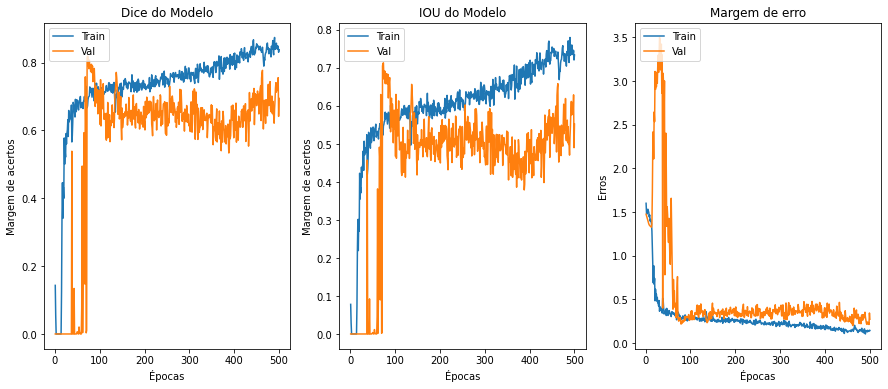

In [15]:
plot_results(history_cup, epochs)

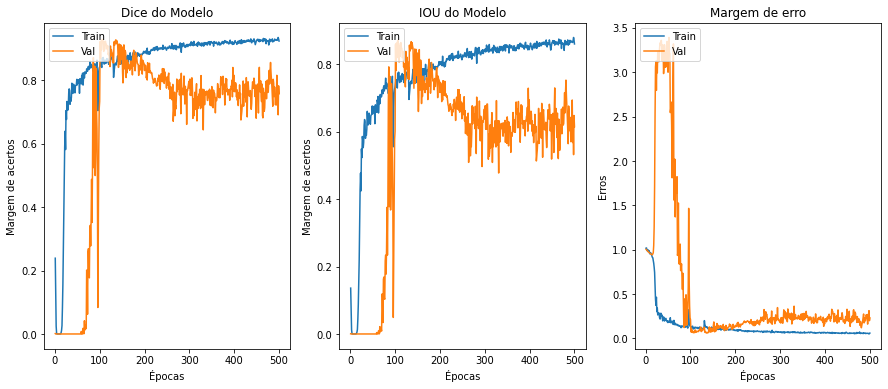

In [16]:
plot_results(history_disc, epochs)

In [17]:
result, diametros_cup, diametros_disc = create_table_result(pred_cup, pred_disc, test_idx)

image #0 - cdr = 0.8427225861656665
image #1 - cdr = 0.7588286433700908
image #2 - cdr = 0.580036182714294
image #3 - cdr = 0.7312971854160593
image #4 - cdr = 0.7392431380447155
image #5 - cdr = 0.8670929090424847
image #6 - cdr = 0.604789889181812
image #7 - cdr = 0.7721516782740483
image #8 - cdr = 0.7592736481967535
image #9 - cdr = 0.8113937553099745
image #10 - cdr = 0.8736835467237493
image #11 - cdr = 0.7354816439844745
image #12 - cdr = 0.8341640246765866
image #13 - cdr = 0.8843099563895953
image #14 - cdr = 0.7971223600642126
image #15 - cdr = 0.9249854925411223
image #16 - cdr = 0.7900937375102755
image #17 - cdr = 0.7430474858337754
image #18 - cdr = 0.6800155937387055
image #19 - cdr = 0.7603354688584698
image #20 - cdr = 0.7431152195132471
image #21 - cdr = 0.7278248702823368
image #22 - cdr = 0.7629081090494002
image #23 - cdr = 0.6102362651613742
image #24 - cdr = 0.8030154844257802
image #25 - cdr = 0.7891267953710157
image #26 - cdr = 0.8057808532354381
image #27 - c

In [18]:
pd.DataFrame(data= result)

cdr      area
0   0.842723  0.585915
1   0.758829  0.565615
2   0.580036  0.404767
3   0.731297  0.488496
4   0.739243  0.373725
5   0.867093  0.512409
6   0.604790  0.397689
7   0.772152  0.551536
8   0.759274  0.533457
9   0.811394  0.570309
10  0.873684  0.603281
11  0.735482  0.530111
12  0.834164  0.625706
13  0.884310  0.609728
14  0.797122  0.381667
15  0.924985  0.456162
16  0.790094  0.556140
17  0.743047  0.537624
18  0.680016  0.365743
19  0.760335  0.435933
20  0.743115  0.501501
21  0.727825  0.547006
22  0.762908  0.537108
23  0.610236  0.361275
24  0.803015  0.500120
25  0.789127  0.525792
26  0.805781  0.517925
27  0.640437  0.390121
28  0.721793  0.533197
29  0.787216  0.543338
30  0.764723  0.563138
31  0.852306  0.628280
32  0.791000  0.570447
33  0.743116  0.452661
34  0.856674  0.538565
35  0.874430  0.544496
36  0.788132  0.482665
37  0.795407  0.517179
38  0.801394  0.546077
39  0.887160  0.638630
40  0.795960  0.576431
41  0.810459  0.546566
42  0.903712  0.531136
43  0.719640  0.458677
44  0.782752  0.526286
45  0.671379  0.419446
46  0.775427  0.540713
47  0.683052  0.453910
48  0.627219  0.427526
49  0.748680  0.524986
50  0.684248  0.289246

In [20]:
cup = np.array(diametros_cup)
disc = np.array(diametros_disc)
pd.DataFrame(data={'cup - dm': cup[:,0], 'cup - dM': cup[:,1], 'disc - dm': disc[:,0], 'disc - dM': disc[:,1]})

cup - dm   cup - dM  disc - dm   disc - dM
0   45.631878  59.284504  64.691803   70.348778
1   46.705715  56.310925  64.344681   74.207695
2   41.008484  56.808201  60.005177   97.939064
3   42.677120  52.585709  63.348103   71.907440
4   31.956942  75.973549  62.858128  102.772072
5   39.281025  77.695473  65.374756   89.604553
6   34.766682  57.399231  55.120975   94.907722
7   44.859657  61.392056  65.772591   79.507767
8   44.263577  58.464569  62.731659   77.000656
9   48.203144  61.904728  68.503426   76.294312
10  46.536293  66.909134  67.287025   76.582802
11  40.627525  66.633278  57.846737   90.598152
12  48.729862  58.179829  64.869225   69.746269
13  42.182884  63.489403  60.935738   71.795418
14  32.734184  77.521919  59.020229   97.252220
15  31.468510  92.363724  62.158573   99.854240
16  42.785915  57.116444  60.414257   72.290718
17  44.034630  49.072750  60.421238   66.042549
18  32.753944  58.422913  59.437683   85.914078
19  37.980705  64.985786  65.355576   85.469887
20  40.450539  53.105984  59.484547   71.463997
21  43.969788  49.540890  58.327263   68.067047
22  43.069668  54.615791  60.801231   71.588951
23  32.861752  41.016102  55.355854   67.213478
24  41.063625  65.328911  65.880928   81.354485
25  44.049236  68.738403  65.192078   87.106918
26  43.888073  59.750195  68.290207   74.151917
27  40.934666  44.398125  65.813576   69.324776
28  46.816475  50.157227  62.795208   69.489784
29  43.833988  56.760548  63.258884   72.102898
30  45.224205  55.305782  60.546104   72.321350
31  46.602699  59.257809  63.156700   69.526459
32  45.091839  56.509953  62.397041   71.441124
33  44.823544  56.718235  72.693932   76.324883
34  39.814091  65.942551  62.206356   76.975090
35  42.176670  61.468254  67.927994   70.295258
36  40.602116  63.525246  64.515129   80.602295
37  42.441364  60.946415  65.010887   76.622910
38  43.393246  61.313057  63.493958   76.508049
39  46.266087  64.613716  64.034805   72.832108
40  49.625145  59.657917  66.843422   74.950905
41  44.013245  61.877003  64.748795   76.348122
42  39.544109  93.805115  66.753937  103.799820
43  39.393925  63.762833  61.661942   88.603775
44  41.205727  58.409058  61.060371   74.620155
45  37.489876  56.120674  60.411541   83.590210
46  43.226074  60.456314  61.712719   77.965149
47  36.284317  50.806091  55.187725   74.380974
48  45.615250  49.634735  66.463120   79.134636
49  44.737198  53.410885  63.037075   71.340080
50  29.938021  61.238968  69.773865   89.498253